## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 10


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [13]:
# Read files
df_flights = pd.read_csv("data/flights.csv")
df_passengers = pd.read_csv("data/passengers.csv")
df_fuel = pd.read_csv('data/fuel.csv')

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

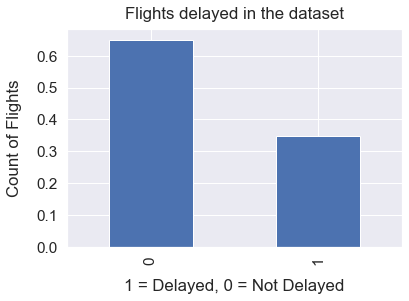

In [ ]:
## Check for how many flights are delayed and how many arrive on time. Be weary of this imbalance during modeling
sns.set(font_scale=1.4)
df_flights.flight_delayed.value_counts(normalize=True).plot(kind = 'bar')
plt.xlabel("1 = Delayed, 0 = Not Delayed", labelpad=14)
plt.ylabel("Count of Flights", labelpad=14)
plt.title("Flights delayed in the dataset", y=1.02);

1. Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [22]:
# separate the year. Month data is already separated during cleanup
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'],format='%Y-%m-%d')
df_flights['year'] = pd.DatetimeIndex(df_flights['fl_date']).year
df_flights.year.unique()

array([2018, 2019])

In [37]:
monthly_delay = df_flights.groupby(['year', 'mkt_unique_carrier','carrier', 'month'])[['dep_delay', 'arr_delay']].sum().reset_index().rename(columns={'dep_delay': 'monthly_dep_delay', 'arr_delay': 'monthly_arr_delay'})
monthly_delay.sample(10)

,year,mkt_unique_carrier,carrier,month,monthly_dep_delay,monthly_arr_delay
65,2018,G4,Allegiant Air,6,2261.0,1938.0
181,2019,F9,Frontier Airlines,11,1159.0,237.0
209,2019,NK,Spirit Airlines,3,611.0,-1100.0
215,2019,NK,Spirit Airlines,9,168.0,-1406.0
146,2019,AS,Alaska Airlines,12,4812.0,2924.0
123,2019,AA,American Airlines,1,15809.0,8410.0
80,2018,HA,Hawaiian Airlines,9,-274.0,-375.0
57,2018,F9,Frontier Airlines,10,2693.0,2072.0
95,2018,NK,Spirit Airlines,12,317.0,-960.0
23,2018,AS,Alaska Airlines,12,1179.0,-272.0


2. Find out distance covered monthly by different air carriers
3. Find out number of passengers that were carried by different air carriers

In [38]:
df_passengers.sample(5)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
84447,90.0,90.0,9310100.0,24478.0,17493.0,1222736.0,0.0,4750.0,49153.0,46673.0,...,GB,United Kingdom,6,627,1,2019,4,10,F,IU
79720,1.0,1.0,122000.0,242.0,207.0,7443.0,0.0,3925.0,463.0,437.0,...,ES,Spain,6,696,1,2019,3,8,F,IU
166675,2.0,5.0,248500.0,925.0,579.0,2138.0,2103.0,1969.0,1340.0,1124.0,...,US,United States,6,721,1,2018,9,4,F,DU
175083,88.0,86.0,4351400.0,15746.0,12728.0,125043.0,52853.0,1121.0,14795.0,12528.0,...,US,United States,6,699,1,2018,9,3,F,DU
190309,9.0,9.0,390600.0,1575.0,1412.0,2584.0,0.0,541.0,758.0,623.0,...,US,United States,6,614,1,2019,7,2,F,DU


In [39]:
print(df_flights.mkt_unique_carrier.unique())

['DL' 'UA' 'AA' 'WN' 'AS' 'F9' 'HA' 'NK' 'B6' 'G4' 'VX']


In [40]:
## Given that there are different years, we are only interested in data from 2018, similar to what we have in our flights database
## and only airlines that we have worked with in flights dataset
df_passengers = df_passengers[df_passengers.year >= 2018]
df_passengers = df_passengers[df_passengers.unique_carrier.isin(['DL', 'UA', 'AA', 'WN', 'AS', 'F9', 'HA', 'NK', 'B6', 'G4', 'VX'])]

In [ ]:
monthly_delay = df_flights.groupby(['year', 'mkt_unique_carrier','carrier', 'month'])[['dep_delay', 'arr_delay']].sum().reset_index().rename(columns={'dep_delay': 'monthly_dep_delay', 'arr_delay': 'monthly_arr_delay'})
monthly_delay.sample(10)

In [42]:
monthly_passengers = df_passengers.groupby(['year', 'unique_carrier', 'month'])[['passengers', 'distance']].sum().reset_index().rename(columns={'unique_carrier': 'mkt_unique_carrier'})
monthly_passengers.sample(10)

,year,mkt_unique_carrier,month,passengers,distance
233,2019,WN,3,1105340.0,285022.0
71,2018,G4,12,94788.0,66674.0
55,2018,F9,8,97452.0,98683.0
165,2019,DL,7,1091177.0,288335.0
74,2018,HA,3,98520.0,23412.0
155,2019,B6,9,281553.0,72947.0
28,2018,B6,5,387942.0,85574.0
83,2018,HA,12,73590.0,38666.0
211,2019,NK,5,261114.0,135000.0
94,2018,NK,11,201492.0,66176.0


4. Find out total fuel comsumption per air carrier.

In [44]:
df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
1,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
4,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,2972000.0,...,34098000.0,9752000.0,17965000.0,3524000.0,31241000.0,65339000.0,34098000.0,31241000.0,65339000.0,2016


In [46]:
## Given that there are different years, we are only interested in data from 2018, similar to what we have in our flights database
## and only airlines that we have worked with in flights dataset
df_fuel = df_fuel[df_fuel.year >= 2018]
df_fuel = df_fuel[df_fuel.unique_carrier.isin(['DL', 'UA', 'AA', 'WN', 'AS', 'F9', 'HA', 'NK', 'B6', 'G4', 'VX'])]

In [47]:
monthly_fuel = df_fuel.groupby(['unique_carrier', 'year', 'month'])['total_gallons'].sum().reset_index().rename(columns={'unique_carrier': 'mkt_unique_carrier'})
monthly_fuel.sample(10)

,mkt_unique_carrier,year,month,total_gallons
209,WN,2019,9,162505172.0
75,DL,2019,1,273706863.0
191,WN,2018,3,179607460.0
124,G4,2019,8,16210186.0
45,B6,2018,4,70477962.0
106,G4,2018,2,14997636.0
53,B6,2018,12,74132762.0
83,DL,2019,9,303891710.0
90,F9,2018,7,22419797.0
95,F9,2018,12,22195128.0


Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [55]:
# Merge the queries
merged = pd.merge(monthly_delay, monthly_passengers, on=['mkt_unique_carrier', 'year', 'month'], how='left')
merged = pd.merge(merged, monthly_fuel, on=['mkt_unique_carrier', 'year', 'month'], how='inner')
merged

,year,mkt_unique_carrier,carrier,month,monthly_dep_delay,monthly_arr_delay,passengers,distance,total_gallons
0,2018,AA,American Airlines,1,18473.0,10105.0,1092145.0,268892.0,283974071.0
1,2018,AA,American Airlines,2,18578.0,11360.0,945299.0,249575.0,261946387.0
2,2018,AA,American Airlines,3,10816.0,333.0,1175027.0,235609.0,298906244.0
3,2018,AA,American Airlines,4,12650.0,3224.0,841904.0,224651.0,297784292.0
4,2018,AA,American Airlines,5,22522.0,13224.0,890366.0,264824.0,318954880.0
...,...,...,...,...,...,...,...,...,...
205,2019,WN,Southwest Airlines,5,19083.0,8794.0,1260281.0,224076.0,179914831.0
206,2019,WN,Southwest Airlines,6,21041.0,11446.0,1206448.0,245893.0,179131347.0
207,2019,WN,Southwest Airlines,7,14732.0,3837.0,1351205.0,218826.0,185099344.0
208,2019,WN,Southwest Airlines,8,13937.0,4617.0,1157956.0,228923.0,176971032.0


In [57]:
merged.isnull().sum()

year                  0
mkt_unique_carrier    0
carrier               0
month                 0
monthly_dep_delay     0
monthly_arr_delay     0
passengers            0
distance              0
total_gallons         0
dtype: int64

In [58]:
# Get fuel consumption per mile. Not getting fuel consumption per passenger as it doesn't make much sense
merged['gallons_per_mile'] = (merged.total_gallons / merged.distance)
merged

,year,mkt_unique_carrier,carrier,month,monthly_dep_delay,monthly_arr_delay,passengers,distance,total_gallons,gallons_per_mile
0,2018,AA,American Airlines,1,18473.0,10105.0,1092145.0,268892.0,283974071.0,1056.089698
1,2018,AA,American Airlines,2,18578.0,11360.0,945299.0,249575.0,261946387.0,1049.569817
2,2018,AA,American Airlines,3,10816.0,333.0,1175027.0,235609.0,298906244.0,1268.653761
3,2018,AA,American Airlines,4,12650.0,3224.0,841904.0,224651.0,297784292.0,1325.541805
4,2018,AA,American Airlines,5,22522.0,13224.0,890366.0,264824.0,318954880.0,1204.403226
...,...,...,...,...,...,...,...,...,...,...
205,2019,WN,Southwest Airlines,5,19083.0,8794.0,1260281.0,224076.0,179914831.0,802.918791
206,2019,WN,Southwest Airlines,6,21041.0,11446.0,1206448.0,245893.0,179131347.0,728.493072
207,2019,WN,Southwest Airlines,7,14732.0,3837.0,1351205.0,218826.0,185099344.0,845.874549
208,2019,WN,Southwest Airlines,8,13937.0,4617.0,1157956.0,228923.0,176971032.0,773.059203


Text(0.5, 1.0, 'Fuel Consumptions Vs. Flight Delay')

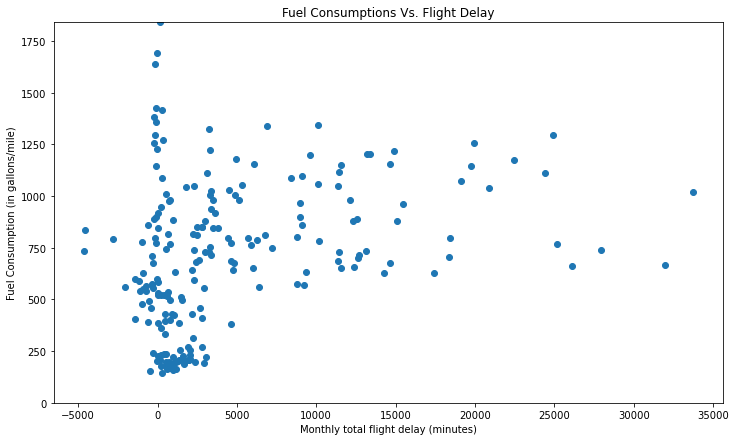

In [59]:
plt.figure(figsize=(12,7))
plt.scatter(merged.monthly_arr_delay, merged.gallons_per_mile)
plt.ylim(0, max(merged.gallons_per_mile))
plt.ylabel('Fuel Consumption (in gallons/mile)')
plt.xlabel('Monthly total flight delay (minutes)')
plt.title('Fuel Consumptions Vs. Flight Delay')

The data is hard to draw conclusions on, but generally speaking, higher delays do tend to lead to higher fuel consumption on average.